In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/sample_data/raw_sales.csv')
dataset['datesold'] = pd.to_datetime(dataset['datesold'])
dataset.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [3]:
print(dataset)

        datesold  postcode   price propertyType  bedrooms
0     2007-02-07      2607  525000        house         4
1     2007-02-27      2906  290000        house         3
2     2007-03-07      2905  328000        house         3
3     2007-03-09      2905  380000        house         4
4     2007-03-21      2906  310000        house         3
...          ...       ...     ...          ...       ...
29575 2019-07-25      2900  500000         unit         3
29576 2019-07-25      2612  560000         unit         2
29577 2019-07-26      2912  464950         unit         2
29578 2019-07-26      2601  589000         unit         2
29579 2019-07-26      2612  775000         unit         2

[29580 rows x 5 columns]


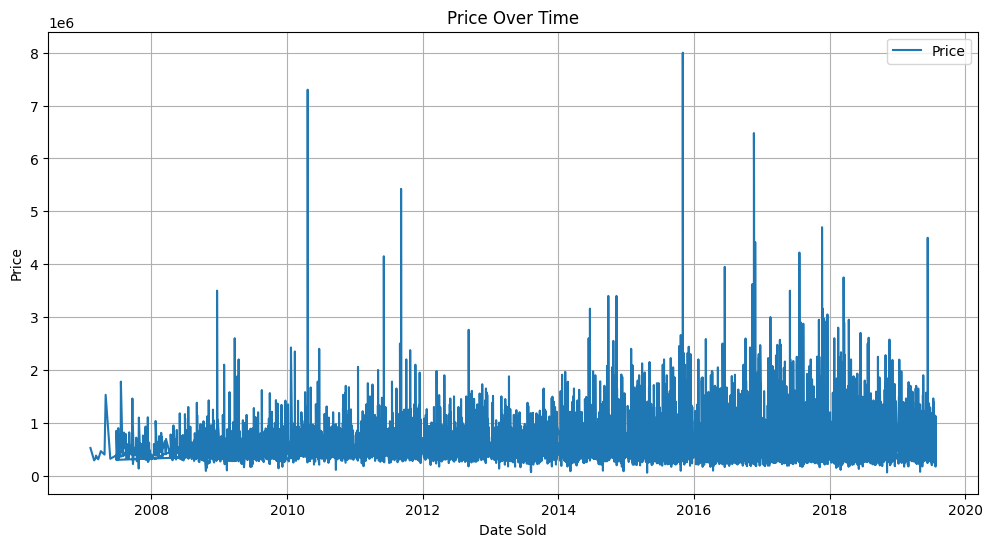

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datesold'], dataset['price'], label='Price')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[['price', 'bedrooms']])

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

In [13]:
min_value = scaled_data.min()
max_value = scaled_data.max()
data_range = max_value - min_value
threshold_mae = data_range * 0.1
print("Threshold MAE:", threshold_mae)

Threshold MAE: 0.1


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
early_stopping = EarlyStopping(monitor='mae', mode='min', patience=3, restore_best_weights=True)


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
740/740 [==============================] - 11s 9ms/step - loss: 0.0436 - mae: 0.1487 - val_loss: 0.1008 - val_mae: 0.2870
Epoch 2/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0188 - mae: 0.1119 - val_loss: 0.0921 - val_mae: 0.2734
Epoch 3/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0182 - mae: 0.1102 - val_loss: 0.0993 - val_mae: 0.2848
Epoch 4/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0178 - mae: 0.1096 - val_loss: 0.0859 - val_mae: 0.2632
Epoch 5/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0174 - mae: 0.1086 - val_loss: 0.0842 - val_mae: 0.2602
Epoch 6/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0172 - mae: 0.1079 - val_loss: 0.0906 - val_mae: 0.2711
Epoch 7/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0169 - mae: 0.1069 - val_loss: 0.0840 - val_mae: 0.2602
Epoch 8/100
740/740 [==============================] - 5s 7ms/step -

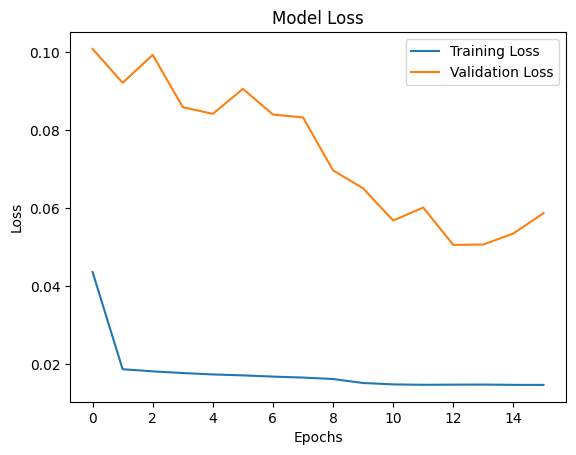

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()